In [1]:
import numpy as np
p = 500 # Number of dimensions
n0 = 150 # Number of in-control samples
n1 = 150 # Number of out-of-control samples
Tmax = n0+n1
delta = 1 # Change magnitude
c = 1 # Target meanshift is c * M
k = 50 # Number of failuer Mode
sel_failure_mode = [0,1]
M = np.kron(np.eye(k),np.ones((int(p/k),1))) # Mean Failure Modes
Ks = 5

nsensors = 5

In [2]:
def data_gen_func0(n_batch, Tmax, seed):
    # Generate normal samples
    np.random.seed(seed)    
    data = np.random.randn(n_batch,Tmax,p)
    return data

def data_gen_func1(n_batch, Tmax, seed, T0, delta):
    # Generate abnormal samples
    np.random.seed(seed)
    data = np.random.randn(n_batch, Tmax, p)
    data[:,T0:,:] = data[:,T0:,:] + np.sum(M[:,sel_failure_mode]*delta,1)
    return data


In [3]:
from ExtendedTSSRP import ExtendedTSSRP
from TSSRP import TSSRP
from Oracle import Oracle
from spc import spc
truesensidx = np.arange(nsensors)
nmodels = 6
model_all = [[] for i in range(nmodels)]

# p, c, k, M, nsensors, Ks, L=-1, chart = 'srp',mode = 'T2'
    
model_all[0] = ExtendedTSSRP(p, c, k,M,nsensors,Ks,L=-1,chart = 'srp',mode='T2')
model_all[1] = ExtendedTSSRP(p, c, k,M,nsensors,Ks,L=-1,chart = 'cusum')
model_all[2] = TSSRP(p, c, k,M,nsensors,Ks,L=-1,chart='srp',mode='T2')
model_all[3] = TSSRP(p, c, k,M,nsensors,Ks,L=-1,chart='cusum',mode='T2')
model_all[4] = Oracle(truesensidx, p, c, k, M, nsensors, Ks, L=-1, chart = 'srp',mode='T2')
model_all[5] = ExtendedTSSRP(p, c, k, M, nsensors, Ks, L=-1, chart = 'srp',mode='T1')
model_name = ['ETSSRP_srp_model','ETSCUSUM_srp_model','TSSRP_srp_model','TSCUSUM_srp_model','orcale_model','ETSCUSUM_srp_model_T1']


### Phase I Analysis 

In [ ]:
spc_model_all = [[] for i in range(nmodels)]
L = np.zeros(nmodels)
n_batch_phaseI = 20
ARL0 = 200
Tmax = 500
seed_list = np.arange(50)
for i in [5]: 
    print(model_name[i])
    monitor_statistics = lambda x, T0, L: model_all[i].compute_monitor_batch(x,T0, L)
    spc_model_all[i] = spc(monitor_statistics,data_gen_func0, data_gen_func1)
    L[i] = spc_model_all[i].phase1(n_batch_phaseI, Tmax, seed_list,r=1000,ARL0=ARL0)
    
import pickle
PIK = "L_5.pickle"
with open(PIK, "wb") as f:
    pickle.dump(L, f)

  0%|          | 0/50 [00:00<?, ?it/s]

ETSCUSUM_srp_model_T1


  2%|▏         | 1/50 [00:16<13:07, 16.07s/it]

### Phase II Analysis 


In [6]:
delta_all =  [0,0.1,0.2,0.3,0.4,0.5,0.6,0.8,1,1.2,1.5,1.8,2,3,4]
lendelta = len(delta_all)
n_batch = 50
ARL_all = np.zeros((nmodels,lendelta))
for i in [5]: 
    print(model_name[i])    
    for j,jdelta in enumerate(delta_all):
        print(jdelta)
        T_all, RL = spc_model_all[i].phase2( n_batch, Tmax, np.arange(100,120), 20, delta=jdelta)
        ARL_all[i,j] = np.mean(RL)

import pickle
PIK = "ARL_5.pickle"
with open(PIK, "wb") as f:
    pickle.dump(ARL_all, f)

  0%|          | 0/10 [00:00<?, ?it/s]

ETSSRP_srp_model
0


  0%|          | 0/10 [00:00<?, ?it/s]

0.1


  0%|          | 0/10 [00:00<?, ?it/s]

0.2


  0%|          | 0/10 [00:00<?, ?it/s]

0.3


  0%|          | 0/10 [00:00<?, ?it/s]

0.4


  0%|          | 0/10 [00:00<?, ?it/s]

0.5


  0%|          | 0/10 [00:00<?, ?it/s]

0.6


  0%|          | 0/10 [00:00<?, ?it/s]

0.8


  0%|          | 0/10 [00:00<?, ?it/s]

1


  0%|          | 0/10 [00:00<?, ?it/s]

1.2


  0%|          | 0/10 [00:00<?, ?it/s]

1.5


  0%|          | 0/10 [00:00<?, ?it/s]

1.8


  0%|          | 0/10 [00:00<?, ?it/s]

2


  0%|          | 0/10 [00:00<?, ?it/s]

3


  0%|          | 0/10 [00:00<?, ?it/s]

4


  0%|          | 0/10 [00:00<?, ?it/s]

ETSCUSUM_srp_model
0


  0%|          | 0/10 [00:00<?, ?it/s]

0.1


  0%|          | 0/10 [00:00<?, ?it/s]

0.2


  0%|          | 0/10 [00:00<?, ?it/s]

0.3


  0%|          | 0/10 [00:00<?, ?it/s]

0.4


  0%|          | 0/10 [00:00<?, ?it/s]

0.5


  0%|          | 0/10 [00:00<?, ?it/s]

0.6


  0%|          | 0/10 [00:00<?, ?it/s]

0.8


  0%|          | 0/10 [00:00<?, ?it/s]

1


  0%|          | 0/10 [00:00<?, ?it/s]

1.2


  0%|          | 0/10 [00:00<?, ?it/s]

1.5


  0%|          | 0/10 [00:00<?, ?it/s]

1.8


  0%|          | 0/10 [00:00<?, ?it/s]

2


  0%|          | 0/10 [00:00<?, ?it/s]

3


  0%|          | 0/10 [00:00<?, ?it/s]

4


  0%|          | 0/10 [00:00<?, ?it/s]

TSSRP_srp_model
0


  0%|          | 0/10 [00:00<?, ?it/s]

0.1


  0%|          | 0/10 [00:00<?, ?it/s]

0.2


  0%|          | 0/10 [00:00<?, ?it/s]

0.3


  0%|          | 0/10 [00:00<?, ?it/s]

0.4


  0%|          | 0/10 [00:00<?, ?it/s]

0.5


  0%|          | 0/10 [00:00<?, ?it/s]

0.6


  0%|          | 0/10 [00:00<?, ?it/s]

0.8


  0%|          | 0/10 [00:00<?, ?it/s]

1


  0%|          | 0/10 [00:00<?, ?it/s]

1.2


  0%|          | 0/10 [00:00<?, ?it/s]

1.5


 10%|█         | 1/10 [00:00<00:01,  5.13it/s]

1.8


 10%|█         | 1/10 [00:00<00:01,  5.13it/s]

2


 10%|█         | 1/10 [00:00<00:01,  5.25it/s]

3


 10%|█         | 1/10 [00:00<00:01,  5.31it/s]

4


  0%|          | 0/10 [00:00<?, ?it/s]

TSCUSUM_srp_model
0


  0%|          | 0/10 [00:00<?, ?it/s]

0.1


  0%|          | 0/10 [00:00<?, ?it/s]

0.2


  0%|          | 0/10 [00:00<?, ?it/s]

0.3


  0%|          | 0/10 [00:00<?, ?it/s]

0.4


  0%|          | 0/10 [00:00<?, ?it/s]

0.5


  0%|          | 0/10 [00:00<?, ?it/s]

0.6


  0%|          | 0/10 [00:00<?, ?it/s]

0.8


  0%|          | 0/10 [00:00<?, ?it/s]

1


  0%|          | 0/10 [00:00<?, ?it/s]

1.2


 10%|█         | 1/10 [00:00<00:01,  5.05it/s]

1.5


 10%|█         | 1/10 [00:00<00:01,  5.16it/s]

1.8


 10%|█         | 1/10 [00:00<00:01,  5.17it/s]

2


 10%|█         | 1/10 [00:00<00:01,  5.29it/s]

3


 10%|█         | 1/10 [00:00<00:01,  5.34it/s]

4


  0%|          | 0/10 [00:00<?, ?it/s]

orcale_model
0


  0%|          | 0/10 [00:00<?, ?it/s]

0.1


  0%|          | 0/10 [00:00<?, ?it/s]

0.2


  0%|          | 0/10 [00:00<?, ?it/s]

0.3


 10%|█         | 1/10 [00:00<00:01,  5.16it/s]

0.4


 10%|█         | 1/10 [00:00<00:01,  5.21it/s]

0.5


 10%|█         | 1/10 [00:00<00:01,  5.24it/s]

0.6


 10%|█         | 1/10 [00:00<00:01,  5.30it/s]

0.8


 10%|█         | 1/10 [00:00<00:01,  5.32it/s]

1


 10%|█         | 1/10 [00:00<00:01,  5.32it/s]

1.2


 10%|█         | 1/10 [00:00<00:01,  5.33it/s]

1.5


 10%|█         | 1/10 [00:00<00:01,  5.34it/s]

1.8


 10%|█         | 1/10 [00:00<00:01,  5.33it/s]

2


 10%|█         | 1/10 [00:00<00:01,  5.33it/s]

3


 10%|█         | 1/10 [00:00<00:01,  5.33it/s]

4


100%|██████████| 10/10 [00:01<00:00,  5.30it/s]


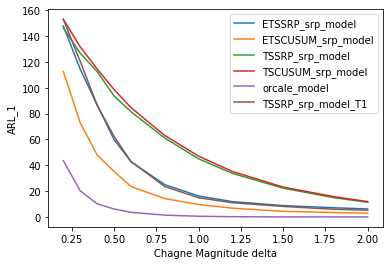

In [14]:
import numpy as np
import pickle
delta_all =  [0,0.1,0.2,0.3,0.4,0.5,0.6,0.8,1,1.2,1.5,1.8,2,3,4]
model_name = ['ETSSRP_srp_model','ETSCUSUM_srp_model','TSSRP_srp_model','TSCUSUM_srp_model','orcale_model','TSSRP_srp_model_T1']

ARL_all = pickle.load( open( "ARL.pickle", "rb" ) )
ARL_5 = pickle.load( open( "ARL_5.pickle", "rb" ) )
ARL_all_new = np.concatenate((ARL_all,ARL_5[[5],:]),0)
nmodels = 6
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(nmodels):
    plt.plot(delta_all[2:-2],ARL_all_new[i,2:-2],label=model_name[i])
    plt.xlabel('Chagne Magnitude delta')
    plt.ylabel('ARL_1')
    plt.legend()

In [12]:
ARL_5.shape

(6, 15)